In [2]:
import cv2
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import skimage
from skimage import io
import numpy as np
import math
from scipy import ndimage
import pandas as pd
import warnings
warnings.simplefilter("ignore")
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
from skimage.transform import rescale, resize



### Approach 1: Basic template matching for detecting eyes template in a given search image 

We explore 3 different options in this namely:
1. Template belongs to the search image.
2. Template is not from search image but has the matching objects in the search image.
3. Serach image does not have the object from the template.

For each options we tried finding a trend in the ncc values to put a thresgolf for eye detection.

In [31]:
def ncc_calc_color(patch, template):
    row, column = template.shape[0], template.shape[1]        
    nccr = np.sum(((patch[:,:,0]-np.mean(patch[:,:,0]))*(template[:,:,0]-np.mean(template[:,:,0])))/(np.std(patch[:,:,0], ddof=1)*np.std(template[:,:,0], ddof=1)))
    nccg = np.sum(((patch[:,:,1]-np.mean(patch[:,:,1]))*(template[:,:,1]-np.mean(template[:,:,1])))/(np.std(patch[:,:,1], ddof=1)*np.std(template[:,:,1], ddof=1)))
    nccb = np.sum(((patch[:,:,2]-np.mean(patch[:,:,2]))*(template[:,:,2]-np.mean(template[:,:,2])))/(np.std(patch[:,:,2], ddof=1)*np.std(template[:,:,2], ddof=1)))
    ncc = nccr + nccg + nccb
    ncc  = ncc / ((row*column)-1)
    ncc = ncc / 3
    return ncc



In [ ]:
def ncc_calc(patch, template):
    row, column = template.shape[0], template.shape[1]        
    patch_mean = np.mean(patch)
    template_mean = np.mean(template) 
    print(patch[:,:].shape)
    print(template[:,:].shape)
    #ncc = np.sum((patch - patch_mean) * (template - template_mean)) / np.sqrt(np.sum((patch - patch_mean)**2) * np.sum((template - template_mean)**2))
    ncc = np.sum(((patch[:,:]-np.mean(patch[:,:]))*(template[:,:]-np.mean(template[:,:])))/np.sqrt(np.sum((patch - np.mean(patch[:,:]))**2) * np.sum((template - np.mean(template[:,:]))**2)))
    ncc  = ncc / ((row*column)-1)
    return ncc

In [132]:
search = io.imread('/Users/beulah_karrolla/Desktop/project/lab_jupyter_nb/CV_proj/data/positive/test7.png') # use the ncc_color_calc function for RGB images
template = io.imread('/Users/beulah_karrolla/Desktop/project/lab_jupyter_nb/CV_proj/data/positive/template5.png')
#search = cv2.cvtColor(search, cv2.COLOR_BGR2GRAY) # use the ncc_calc function for black and white images
#template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
row, col = search.shape[0], search.shape[1]
r, c = template.shape[0], template.shape[1]
print(row, col)
print(r, c)

1632 2448
220 876


In [133]:
search = resize(search, (3024, 4032 ), anti_aliasing=True)

In [134]:
row, col = search.shape[0], search.shape[1]
r, c = template.shape[0], template.shape[1]
print(row, col)
print(r, c)

3024 4032
220 876


In [ ]:
patch_array = []
temp_ncc = 0
for i in range(0, row-r, 10):
    for j in range(0, col-c, 10):
        print(i,j)
        patch = search[i:i+r, j:j+c]
        print(search.shape)
        temp_ncc = float(ncc_calc_color(patch, template))
        patch_array.append([j,i,temp_ncc])


In [136]:
np.save('patch_array_m7.npy', patch_array)

In [71]:
patch_array.sort(reverse=True, key = lambda x: x[2])
m = np.array(patch_array)

In [ ]:
patch_array.sort(reverse=True, key = lambda x: x[2])
m1 = np.array(patch_array)

In [94]:
np.save('m1.npy', m1)

In [92]:
print(m1[0:5])

[[1.89000000e+03 1.87000000e+03 7.05314049e-01]
 [1.89000000e+03 1.88000000e+03 7.03651841e-01]
 [1.88000000e+03 1.87000000e+03 7.02851939e-01]
 [1.88000000e+03 1.88000000e+03 7.02059660e-01]
 [1.90000000e+03 1.87000000e+03 7.01042804e-01]]


In [93]:
print(m[0:5])

[[1.44000000e+03 8.80000000e+02 7.60001381e-01]
 [1.44000000e+03 8.70000000e+02 7.54562481e-01]
 [1.44000000e+03 8.50000000e+02 7.51490393e-01]
 [1.44000000e+03 8.90000000e+02 7.50940002e-01]
 [1.44000000e+03 8.60000000e+02 7.50299735e-01]]


In [57]:
patch_array.sort(reverse=True, key = lambda x: x[2])
m2 = np.array(patch_array)

In [100]:
patch_array.sort(reverse=True, key = lambda x: x[2])
m3 = np.array(patch_array)

In [113]:
patch_array.sort(reverse=True, key = lambda x: x[2])
m4 = np.array(patch_array)

In [121]:
patch_array.sort(reverse=True, key = lambda x: x[2])
m5 = np.array(patch_array)

In [129]:
patch_array.sort(reverse=True, key = lambda x: x[2])
m6 = np.array(patch_array)

In [137]:
patch_array.sort(reverse=True, key = lambda x: x[2])
m7 = np.array(patch_array)

In [ ]:
patch_array.sort(reverse=True, key = lambda x: x[2])
m8 = np.array(patch_array)

<Axes: xlabel='k', ylabel='NCC'>

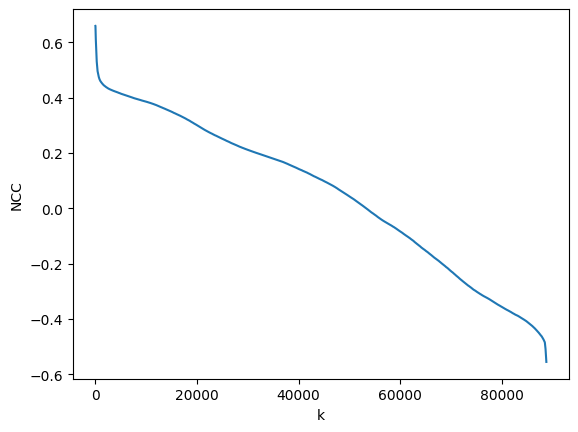

In [138]:
s = pd.Series(m7[:,2])
s.plot.line(xlabel='k',ylabel='NCC')

In [37]:
for n in range(0,10):
    print(m1[n,2], m1[n,2])

0.7600013805614516
0.7545624812770769
0.7514903928962907
0.7509400022613176
0.7502997351297328
0.7490369913566446
0.7486422603655756
0.7479421297703922
0.746981785994124
0.7465179658339407


(-0.5, 875.5, 219.5, -0.5)

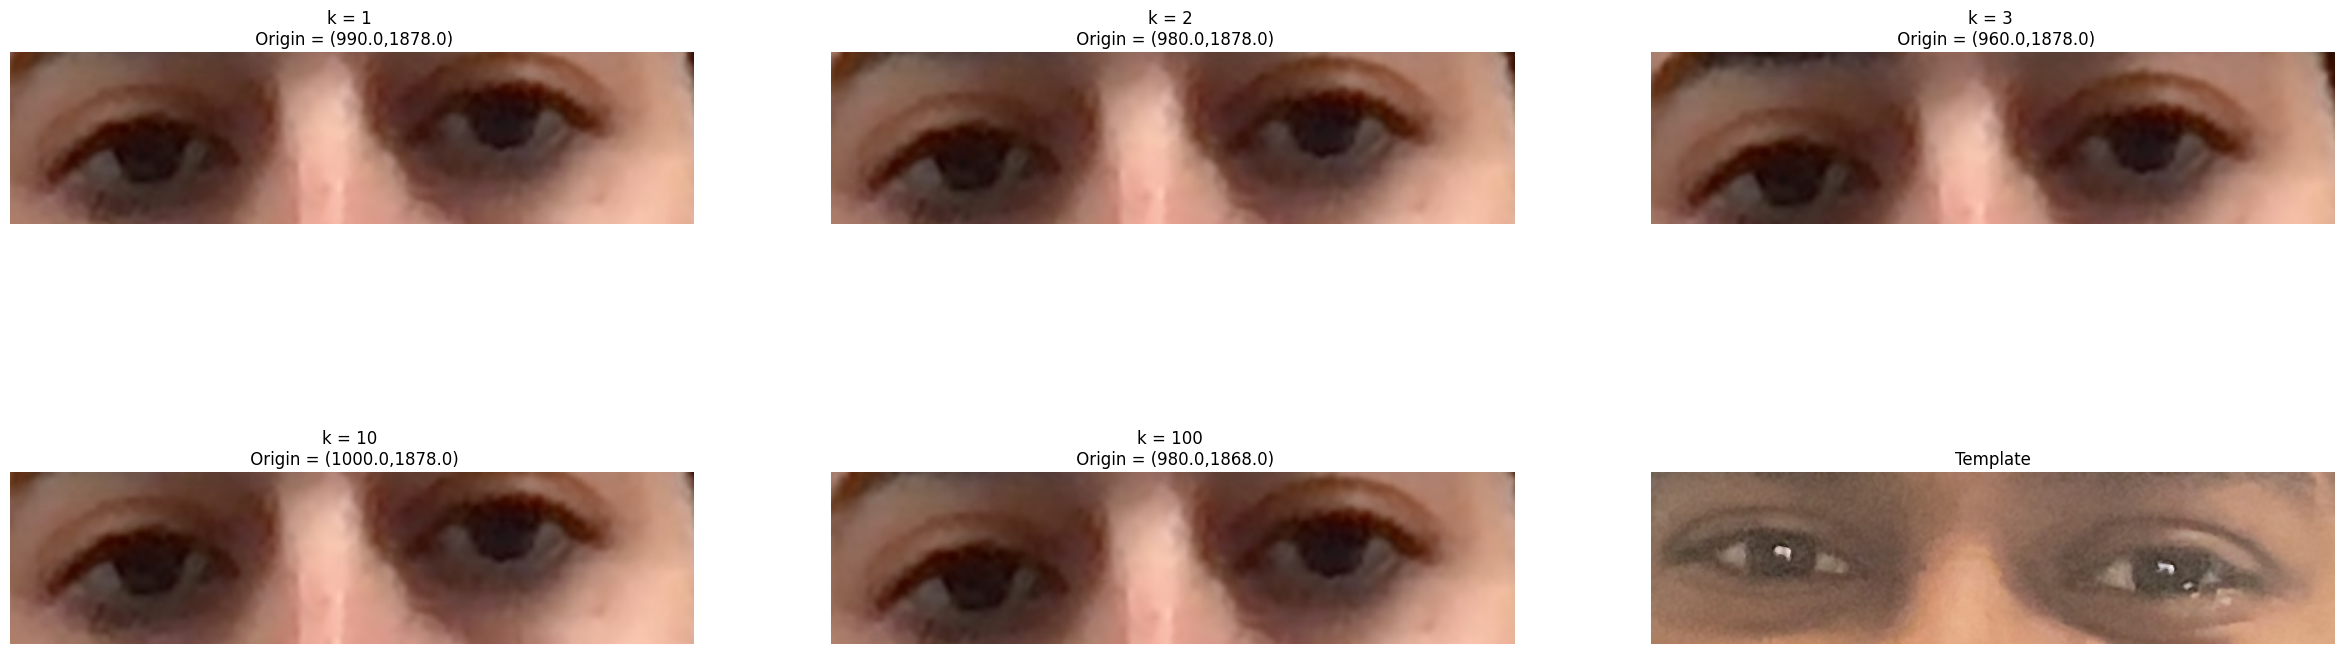

In [39]:
w = int(0.5*c)
h = int(0.5*r)

match1 = search[int(m[0,1]):int(m[0,1])+r, int(m[0,0]):int(m[0,0])+c]
match2 = search[int(m[1,1]):int(m[1,1])+r,int(m[1,0]):int(m[1,0])+c]
match3 = search[int(m[2,1]):int(m[2,1])+r,int(m[2,0]):int(m[2,0])+c]
match4 = search[int(m[3,1]):int(m[3,1])+r,int(m[3,0]):int(m[3,0])+c]
match10 = search[int(m[9,1]):int(m[9,1])+r,int(m[9,0]):int(m[9,0])+c]


fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(2, 3, 1)
ax.imshow(match1)
plt.title("k = 1 \n Origin = ("+ str(m[0,1]+h) + "," + str(m[0,0]+w) + ")")
plt.axis("off")

ax = fig.add_subplot(2, 3, 2)
ax.imshow(match2)
plt.title("k = 2 \n Origin = ("+ str(m[1,1]+h) + "," + str(m[1,0]+w) + ")")
plt.axis("off")

ax = fig.add_subplot(2, 3, 3)
ax.imshow(match3)
plt.title("k = 3 \n Origin = ("+ str(m[2,1]+h) + "," + str(m[2,0]+w) + ")")
plt.axis("off")

ax = fig.add_subplot(2, 3, 4)
ax.imshow(match4)
plt.title("k = 10 \n Origin = ("+ str(m[3,1]+h) + "," + str(m[3,0]+w) + ")")
plt.axis("off")

ax = fig.add_subplot(2, 3, 5)
ax.imshow(match10)
plt.title("k = 100 \n Origin = ("+ str(m[9,1]+h) + "," + str(m[9,0]+w) + ")")
plt.axis("off")

ax = fig.add_subplot(2, 3, 6)
ax.imshow(template)
plt.title("Template")
plt.axis("off")


In [ ]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(2, 3, 1)
ax.imshow(search)
ax.add_patch(plt.Rectangle((m[0,0], m[0,1]), c, r, edgecolor='red', linewidth=2, fill=False))
plt.title("k = 1 \n Origin = ("+ str(m[0,1]+h) + "," + str(m[0,0]+w) + ")")
plt.axis("off")

ax = fig.add_subplot(2, 3, 2)
ax.imshow(search)
ax.add_patch(plt.Rectangle((m[1,0], m[1,1]), c, r, edgecolor='red', linewidth=2, fill=False))
plt.title("k = 2 \n Origin = ("+ str(m[1,1]+h) + "," + str(m[1,0]+w) + ")")
plt.axis("off")

ax = fig.add_subplot(2, 3, 3)
ax.imshow(search)
ax.add_patch(plt.Rectangle((m[2,0], m[2,1]), c, r, edgecolor='red', linewidth=2, fill=False))
plt.title("k = 3 \n Origin = ("+ str(m[2,1]+h) + "," + str(m[2,0]+w) + ")")
plt.axis("off")

ax = fig.add_subplot(2, 3, 4)
ax.imshow(search)
ax.add_patch(plt.Rectangle((m[3,0], m[3,1]), c, r, edgecolor='red', linewidth=2, fill=False))
plt.title("k = 4 \n Origin = ("+ str(m[3,1]+h) + "," + str(m[3,0]+w) + ")")
plt.axis("off")

ax = fig.add_subplot(2, 3, 5)
ax.imshow(search)
ax.add_patch(plt.Rectangle((m[9,0], m[9,1]), c, r, edgecolor='red', linewidth=2, fill=False))
plt.title("k = 10 \n Origin = ("+ str(m[9,1]+h) + "," + str(m[9,0]+w) + ")")
plt.axis("off")

ax = fig.add_subplot(2, 3, 6)
ax.imshow(template)
plt.title("Template")
plt.axis("off")

Text(0.5, 1.0, 'k = 1 \n Origin = (1000.0,2248.0)')

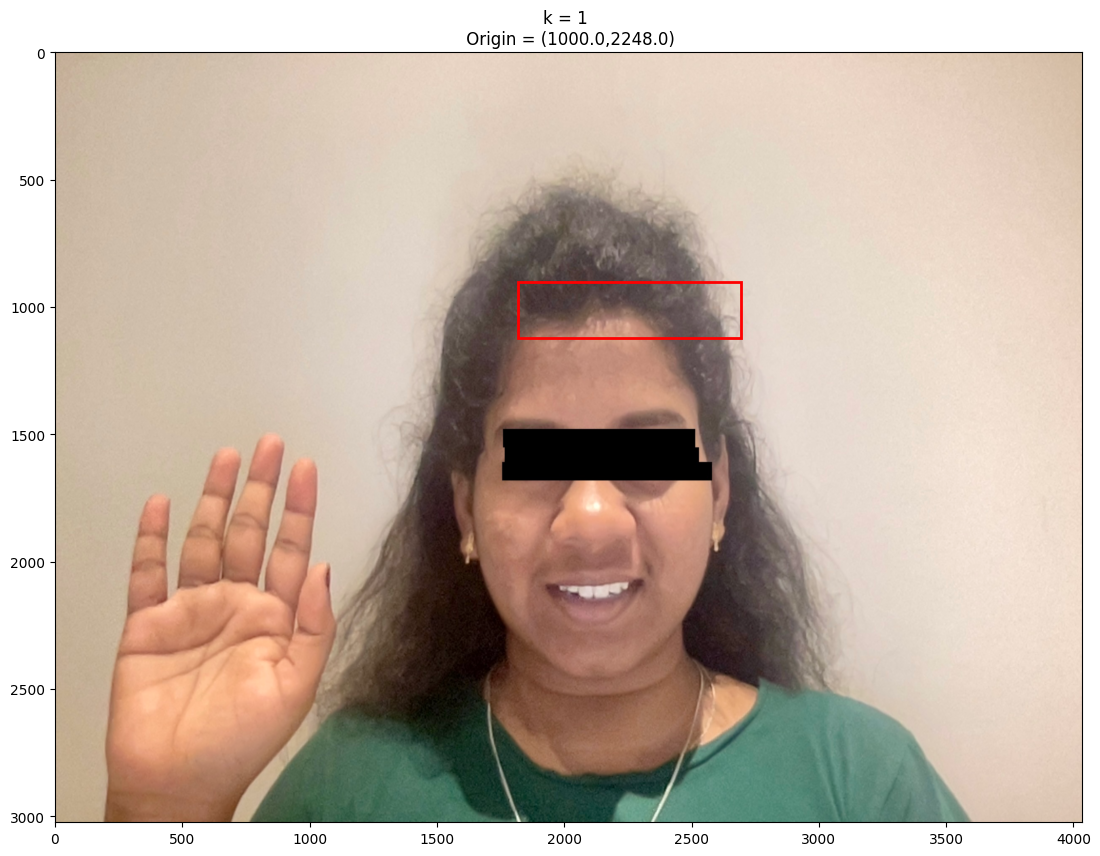

In [139]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(search)
ax.add_patch(plt.Rectangle((m7[0,0], m7[0,1]), c, r, edgecolor='red', linewidth=2, fill=False))
plt.title("k = 1 \n Origin = ("+ str(m7[1,1]+h) + "," + str(m7[1,0]+w) + ")")


In [143]:
test = io.imread('/Users/beulah_karrolla/Desktop/project/lab_jupyter_nb/CV_proj/data/positive/test.png') # use the ncc_color_calc function for RGB images
test1 = io.imread('/Users/beulah_karrolla/Desktop/project/lab_jupyter_nb/CV_proj/data/positive/test1.png') # use the ncc_color_calc function for RGB images
test2 = io.imread('/Users/beulah_karrolla/Desktop/project/lab_jupyter_nb/CV_proj/data/positive/test2.png') # use the ncc_color_calc function for RGB images
test3 = io.imread('/Users/beulah_karrolla/Desktop/project/lab_jupyter_nb/CV_proj/data/positive/test3.png') # use the ncc_color_calc function for RGB images
test4 = io.imread('/Users/beulah_karrolla/Desktop/project/lab_jupyter_nb/CV_proj/data/positive/test4.png') # use the ncc_color_calc function for RGB images
test5 = io.imread('/Users/beulah_karrolla/Desktop/project/lab_jupyter_nb/CV_proj/data/positive/test5.png') # use the ncc_color_calc function for RGB images
test6 = io.imread('/Users/beulah_karrolla/Desktop/project/lab_jupyter_nb/CV_proj/data/positive/search6.png') # use the ncc_color_calc function for RGB images
test7 = io.imread('/Users/beulah_karrolla/Desktop/project/lab_jupyter_nb/CV_proj/data/positive/test7.png') # use the ncc_color_calc function for RGB images


In [148]:
test = resize(test, (3024, 4032 ), anti_aliasing=True)
test1 = resize(test1, (3024, 4032 ), anti_aliasing=True)
test2 = resize(test2, (3024, 4032 ), anti_aliasing=True)
test3 = resize(test3, (3024, 4032 ), anti_aliasing=True)
test4 = resize(test4, (3024, 4032 ), anti_aliasing=True)
test5 = resize(test5, (3024, 4032 ), anti_aliasing=True)
test6 = resize(test6, (3024, 4032 ), anti_aliasing=True)
test7 = resize(test7, (3024, 4032 ), anti_aliasing=True)


In [146]:
print(m[:5])
print(m1[:5])
print(m2[:5])

[[1.44000000e+03 8.80000000e+02 7.60001381e-01]
 [1.44000000e+03 8.70000000e+02 7.54562481e-01]
 [1.44000000e+03 8.50000000e+02 7.51490393e-01]
 [1.44000000e+03 8.90000000e+02 7.50940002e-01]
 [1.44000000e+03 8.60000000e+02 7.50299735e-01]]
[[1.89000000e+03 1.87000000e+03 7.05314049e-01]
 [1.89000000e+03 1.88000000e+03 7.03651841e-01]
 [1.88000000e+03 1.87000000e+03 7.02851939e-01]
 [1.88000000e+03 1.88000000e+03 7.02059660e-01]
 [1.90000000e+03 1.87000000e+03 7.01042804e-01]]
[[1.83000000e+03 9.10000000e+02 6.47761007e-01]
 [1.82000000e+03 9.20000000e+02 6.46673812e-01]
 [1.83000000e+03 9.20000000e+02 6.45254914e-01]
 [1.82000000e+03 9.10000000e+02 6.45129575e-01]
 [1.82000000e+03 9.30000000e+02 6.41213247e-01]]


(-0.5, 4031.5, 3023.5, -0.5)

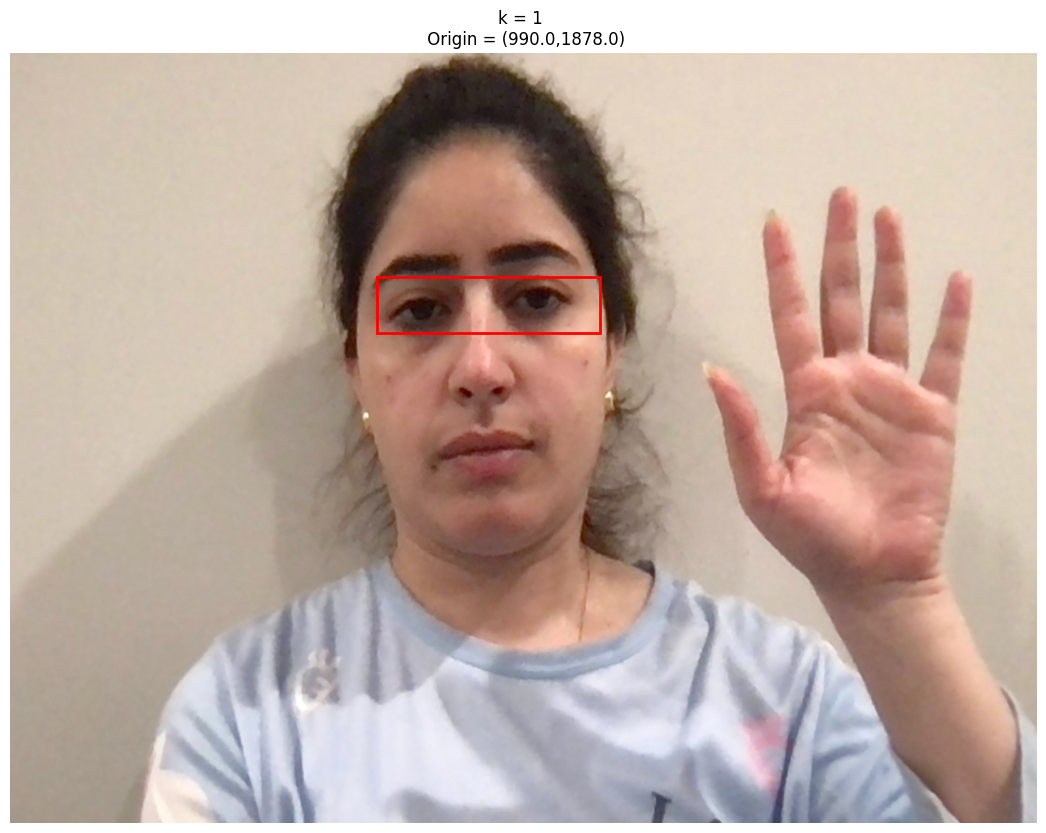

In [149]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(test)
ax.add_patch(plt.Rectangle((m[0,0], m[0,1]), c, r, edgecolor='red', linewidth=2, fill=False))
plt.title("k = 1 \n Origin = ("+ str(m[0,1]+h) + "," + str(m[0,0]+w) + ")")
plt.axis("off")

(-0.5, 875.5, 219.5, -0.5)

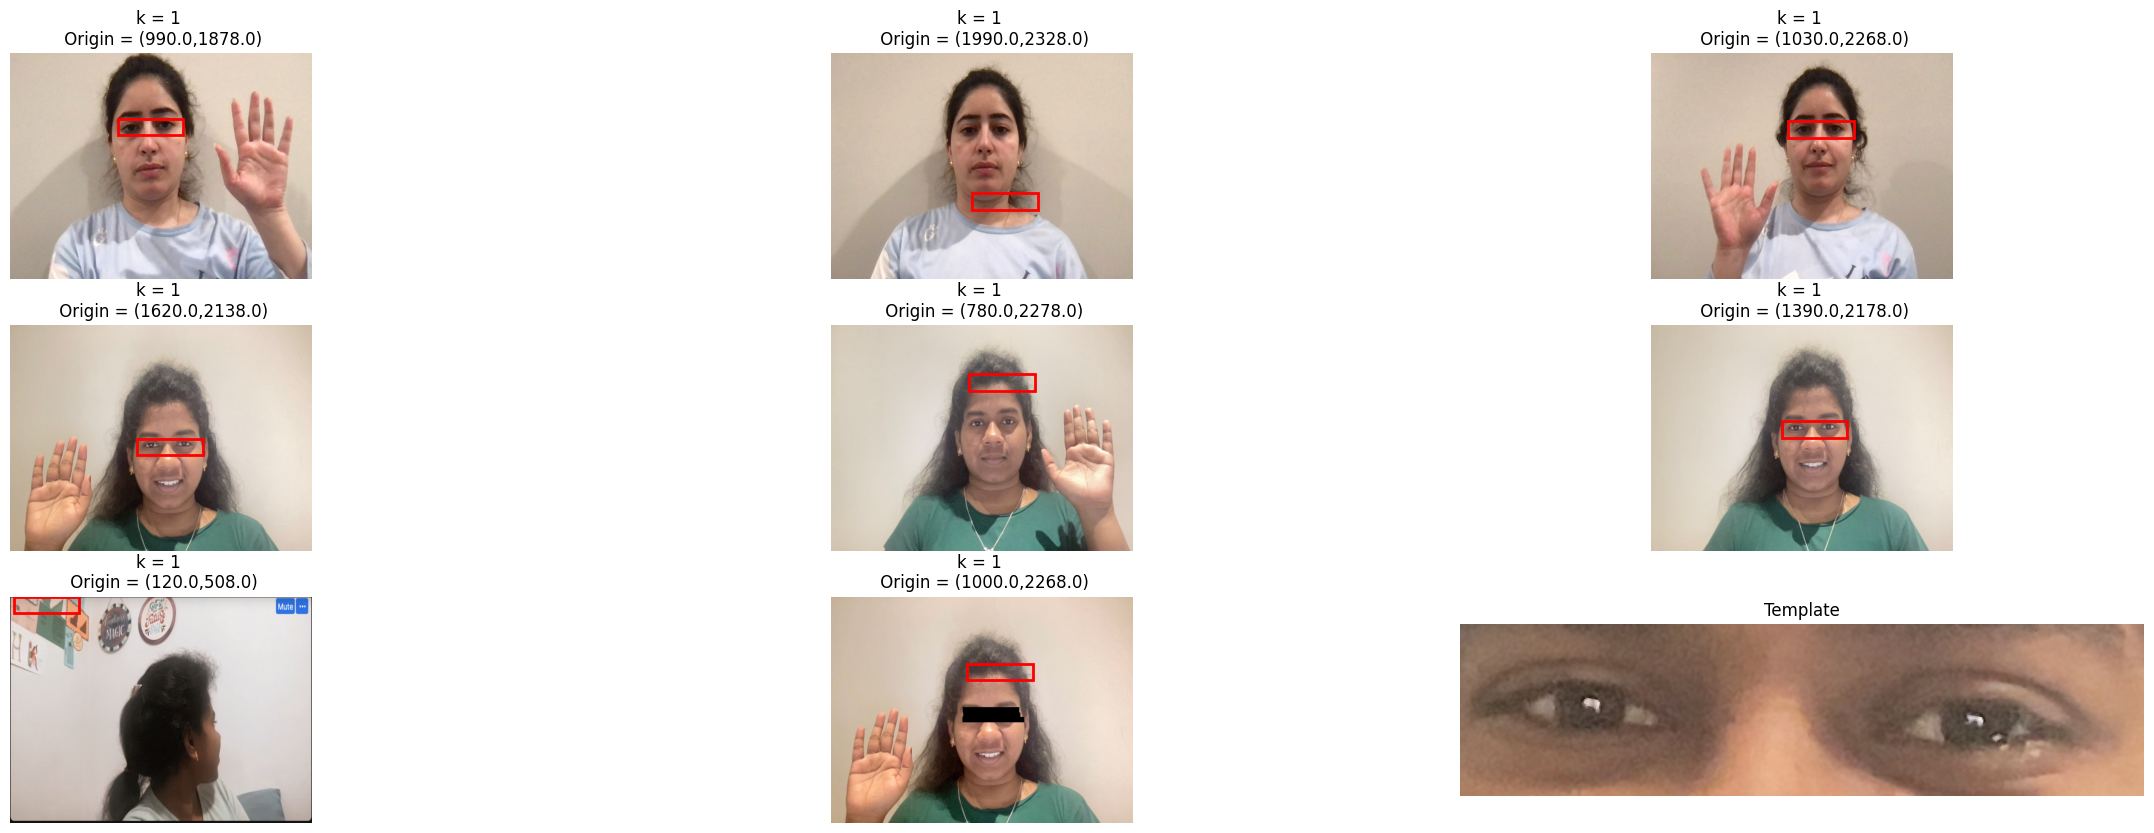

In [150]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(3, 3, 1)
ax.imshow(test)
ax.add_patch(plt.Rectangle((m[0,0], m[0,1]), c, r, edgecolor='red', linewidth=2, fill=False))
plt.title("k = 1 \n Origin = ("+ str(m[0,1]+h) + "," + str(m[0,0]+w) + ")")
plt.axis("off")

ax = fig.add_subplot(3, 3, 2)
ax.imshow(test1)
ax.add_patch(plt.Rectangle((m1[0,0], m1[0,1]), c, r, edgecolor='red', linewidth=2, fill=False))
plt.title("k = 1 \n Origin = ("+ str(m1[1,1]+h) + "," + str(m1[1,0]+w) + ")")
plt.axis("off")

ax = fig.add_subplot(3, 3, 3)
ax.imshow(test2)
ax.add_patch(plt.Rectangle((m2[0,0], m2[0,1]), c, r, edgecolor='red', linewidth=2, fill=False))
plt.title("k = 1 \n Origin = ("+ str(m2[2,1]+h) + "," + str(m2[2,0]+w) + ")")
plt.axis("off")

ax = fig.add_subplot(3, 3, 4)
ax.imshow(test3)
ax.add_patch(plt.Rectangle((m3[0,0], m3[0,1]), c, r, edgecolor='red', linewidth=2, fill=False))
plt.title("k = 1 \n Origin = ("+ str(m3[3,1]+h) + "," + str(m3[3,0]+w) + ")")
plt.axis("off")

ax = fig.add_subplot(3, 3, 5)
ax.imshow(test4)
ax.add_patch(plt.Rectangle((m4[0,0], m4[0,1]), c, r, edgecolor='red', linewidth=2, fill=False))
plt.title("k = 1 \n Origin = ("+ str(m4[9,1]+h) + "," + str(m4[9,0]+w) + ")")
plt.axis("off")

ax = fig.add_subplot(3, 3, 6)
ax.imshow(test5)
ax.add_patch(plt.Rectangle((m5[0,0], m5[0,1]), c, r, edgecolor='red', linewidth=2, fill=False))
plt.title("k = 1 \n Origin = ("+ str(m5[9,1]+h) + "," + str(m5[9,0]+w) + ")")
plt.axis("off")

ax = fig.add_subplot(3, 3, 7)
ax.imshow(test6)
ax.add_patch(plt.Rectangle((m6[0,0], m6[0,1]), c, r, edgecolor='red', linewidth=2, fill=False))
plt.title("k = 1 \n Origin = ("+ str(m6[9,1]+h) + "," + str(m6[9,0]+w) + ")")
plt.axis("off")

ax = fig.add_subplot(3, 3, 8)
ax.imshow(test7)
ax.add_patch(plt.Rectangle((m7[0,0], m7[0,1]), c, r, edgecolor='red', linewidth=2, fill=False))
plt.title("k = 1 \n Origin = ("+ str(m7[9,1]+h) + "," + str(m7[9,0]+w) + ")")
plt.axis("off")

ax = fig.add_subplot(3, 3, 9)
ax.imshow(template)
plt.title("Template")
plt.axis("off")

### Approach 2: Extracting SIFT descritors to detect eye and classifying into left, right, straight and no look 

In this approach, we are using the kaggle Eye-dataset which has eye images divided into 4 classes, namely
1. Left looking eye
2. Right looking eye
3. Straight looking eye
4. Closed eye

Our method was to train a image classification algorithm, such as KNN and/or decision tree on the SIFT descriptor features extracted from the eye images. For this we first converted the eye images to gray scale and using SIFT algorithm, we extracted the eye features to perform the classification.

The KNN model gave 93% accuracy and decision tree gave around 81% accuracy.

We also experimented with detection eye in real time images, but we could acheive the desired result.

In [4]:
import glob
dataset_path = '/Users/beulah_karrolla/Desktop/project/lab_jupyter_nb/CV_proj/Eye dataset/forward_look/'
eyeimage_files = glob.glob(dataset_path + '/*.png')  # Change the file extension if necessary
print(len(eyeimage_files))


3338


In [5]:
dataset_path = '/Users/beulah_karrolla/Desktop/project/lab_jupyter_nb/CV_proj/Eye dataset/close_look/'
noneye_files = glob.glob(dataset_path + '/*.png')  # Change the file extension if necessary
print(len(noneye_files))
dataset_path = '/Users/beulah_karrolla/Desktop/project/lab_jupyter_nb/CV_proj/Eye dataset/left_look/'
noneye_files.extend( glob.glob(dataset_path + '/*.png'))  # Change the file extension if necessary
print(len(noneye_files))
dataset_path = '/Users/beulah_karrolla/Desktop/project/lab_jupyter_nb/CV_proj/Eye dataset/right_look/'
noneye_files.extend( glob.glob(dataset_path + '/*.png'))  # Change the file extension if necessary
print(len(noneye_files))

3828
6205
8207


In [6]:
eye_images = eyeimage_files  # List of images containing eyes
non_eye_images = noneye_files  # List of images containing non-eye regions

* eye_images = eyeimage_files  # List of images containing eyes
* non_eye_images = noneye_files  # List of images containing non-eye regions

Read the images and store them into a list.


In [19]:
#orb = cv2.SIFT_create()
orb = cv2.ORB_create()

In [ ]:
# Extract features (key points and descriptors) for eye and non-eye images
eye_features = []
count = 0
for img in eye_images:
    eyeimg = io.imread(img)
    if len(eyeimg.shape) == 3:
        grayImg = cv2.cvtColor(eyeimg, cv2.COLOR_BGR2GRAY)
        #grayImg = skimage.color.rgb2gray(eyeimg)
    else:
        grayImg = eyeimg
    
    #grayImg = skimage.color.rgb2gray(eyeimg)
    keypoints, descriptors = orb.detectAndCompute(grayImg, None)
    if descriptors is not None:  # Check if descriptors are extracted
        descriptors = descriptors[:1]
        eye_features.append(descriptors)
        count+=1
        print(count)

In [ ]:
non_eye_features = []
count = 0
for img in non_eye_images:
    noneyeimg = io.imread(img)
    if len(noneyeimg.shape) == 3:
        if noneyeimg.shape[2] == 4:
            continue
        grayImg = cv2.cvtColor(noneyeimg, cv2.COLOR_BGR2GRAY)
        #grayImg = skimage.color.rgb2gray(noneyeimg)
    elif len(noneyeimg.shape) == 2:
        grayImg = noneyeimg
   
    
    #grayImg = skimage.color.rgb2gray(eyeimg)
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    keypoints, descriptors = orb.detectAndCompute(grayImg, None)
    if descriptors is not None:  # Check if descriptors are extracted
        descriptors = descriptors[:1]  # Truncate descriptors to the same length (128)
        non_eye_features.append(descriptors)
        #non_eye_features.append(descriptors)
        count+=1
        print(count)

In [22]:
print(len(eye_features))
print(len(non_eye_features))

2050
3746


In [23]:
# Data preparation for training

eye_features = np.array(eye_features)
non_eye_features = np.array(non_eye_features)
eye_labels = np.ones(eye_features.shape[0])
non_eye_labels = np.zeros(non_eye_features.shape[0])
features = np.vstack((eye_features, non_eye_features))
labels = np.concatenate((eye_labels, non_eye_labels))
features = features.reshape(features.shape[0], -1)  # Flatten each descriptor


In [24]:
# KNN Classifier

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
classifier =  KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9059939629150496


In [25]:
# Decision Tree Classifier

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
classifier2 = tree.DecisionTreeClassifier()
classifier2.fit(X_train, y_train)
y_pred = classifier2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.908150064683053


In [26]:
# SVM Classifier

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
classifier3 = sklearn.svm.LinearSVC()
classifier3.fit(X_train, y_train)
y_pred = classifier3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6399310047434239


In [29]:
## Detect eyes in a real time image

def detect_eyes(image, window_size):
    eye_regions = []
    for y in range(0, image.shape[0], window_size):
        for x in range(0, image.shape[1], window_size):
            patch = image[y:y+window_size, x:x+window_size]
            if len(patch.shape) == 3:
                grayImg = cv2.cvtColor(patch, cv2.COLOR_BGR2GRAY)
                print(grayImg.shape)
                #cv2.imshow('Eyes Detected', grayImg)
            else:
                grayImg = patch
            print(grayImg.shape)
            keypoints, descriptors = orb.detectAndCompute(grayImg, None)
            print(descriptors)
            if descriptors is not None and len(descriptors) > 0:
                prediction = classifier.predict(descriptors)
                print(prediction)
                if prediction.all() == 1.0:
                    eye_regions.append((x, y, window_size, window_size))
            else:
                print("No descriptors")
                break
    return eye_regions

In [30]:
path = '/Users/beulah_karrolla/Desktop/project/lab_jupyter_nb/CV_proj/data/positive/test.png'
input_image = io.imread(path)
print(input_image.shape)

window_size =10

eye_regions = detect_eyes(input_image, window_size)
print("*************")
print(eye_regions)
# Draw circle around detected eye regions
if len(eye_regions) > 0:
    for (x, y, w, h) in eye_regions:
        center_x = x + w // 2
        center_y = y + h // 2
        radius = min(w, h) // 2
        cv2.circle(input_image, (center_x, center_y), radius, (0, 255, 0), 2)
    # Display the image with detected eye regions
    cv2.imshow('Eyes Detected', input_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

(960, 1440, 3)
(10, 10)
(10, 10)
None
No descriptors
(10, 10)
(10, 10)
None
No descriptors
(10, 10)
(10, 10)
None
No descriptors
(10, 10)
(10, 10)
None
No descriptors
(10, 10)
(10, 10)
None
No descriptors
(10, 10)
(10, 10)
None
No descriptors
(10, 10)
(10, 10)
None
No descriptors
(10, 10)
(10, 10)
None
No descriptors
(10, 10)
(10, 10)
None
No descriptors
(10, 10)
(10, 10)
None
No descriptors
(10, 10)
(10, 10)
None
No descriptors
(10, 10)
(10, 10)
None
No descriptors
(10, 10)
(10, 10)
None
No descriptors
(10, 10)
(10, 10)
None
No descriptors
(10, 10)
(10, 10)
None
No descriptors
(10, 10)
(10, 10)
None
No descriptors
(10, 10)
(10, 10)
None
No descriptors
(10, 10)
(10, 10)
None
No descriptors
(10, 10)
(10, 10)
None
No descriptors
(10, 10)
(10, 10)
None
No descriptors
(10, 10)
(10, 10)
None
No descriptors
(10, 10)
(10, 10)
None
No descriptors
(10, 10)
(10, 10)
None
No descriptors
(10, 10)
(10, 10)
None
No descriptors
(10, 10)
(10, 10)
None
No descriptors
(10, 10)
(10, 10)
None
No descripto